In [1]:
import numpy as np
from numpy.linalg import det, inv
import matplotlib.pyplot as plt

# Model of Chapra et.al. (2009)--Appendix 1:

### Superior $(\text{s})$:

$$
    V_\text{s}\frac{\mathrm{d}c_\text{s}}{\mathrm{d}t}=W_\text{s}(t)-Q_\text{s}(t)c_\text{s}
$$

### Michigan $(\text{m})$:

$$
    V_\text{m}\frac{\mathrm{d}c_\text{m}}{\mathrm{d}t}=W_\text{m}(t)-Q_\text{m}(t)c_\text{m}-Q_d(t)c_\text{m}+E^\prime (c_\text{h}-c_\text{m})
$$

<!-- typo in above equation fixed here Q_d(t)c_\text{m} (was Q_d(t)c_d) -->

where $d$ diverted water near Chicago and $E^\prime$ is the bulk diffusion coefficient of 36 km³/year (Chapra et.al., 2009). 

### Huron $(\text{h})$:

$$
    V_\text{h}\frac{\mathrm{d}c_\text{h}}{\mathrm{d}t}=W_\text{h}(t)+Q_\text{s}(t)c_\text{s}+Q_\text{m}(t)c_\text{m}-Q_\text{h}(t)c_\text{h}+E^\prime (c_\text{m}-c_\text{h})
$$

### Erie $(\text{e})$:

$$
    V_\text{e}\frac{\mathrm{d}c_\text{e}}{\mathrm{d}t}=W_\text{e}(t)+Q_\text{h}(t)c_\text{h}-Q_\text{e}(t)c_\text{e}
$$

### Ontario $(\text{o})$:

$$
    V_\text{o}\frac{\mathrm{d}c_\text{o}}{\mathrm{d}t}=W_\text{o}(t)+Q_\text{e}(t)c_\text{e}-Q_\text{o}(t)c_\text{o}
$$

## Steady State model

$$ \mathbf{A}\mathbf{c}=\mathbf{w} $$

where $\mathbf{A}$ is the matrix of water exchange [km³/year], $\mathbf{c}$ is the vector of steady-state concentrations, and $\mathbf{w}$ the vector of direct loadings [kta].

$$
    \mathbf{A}=
    \begin{bmatrix}
        Q_\text{s} & 0 & 0 & 0 & 0\\
        0 & Q_\text{m}+Q_\text{d}+E^\prime & -E^\prime & 0 & 0\\
        -Q_\text{s} & -Q_\text{m}-E^\prime & Q_\text{h}+E^\prime & 0 & 0\\
        0 & 0 & -Q_\text{h} & Q_\text{e} & 0\\
        a & b & c & -Q_\text{e} & Q_\text{o}
    \end{bmatrix}
$$

In [2]:
# Steady-state great lakes model
def GLSS(Qs,Qm,Qd,Qh,Qe,Qo):
    Eprime = 36 # km³/year (michigan-huron diffusion coefficient)
    return np.array([[Qs,0,0,0,0], 
                     [0,Qm+Qd+Eprime,-Eprime,0,0],
                     [-Qs,-Qm-Eprime,Qh+Eprime,0,0], 
                     [0,0,-Qh,Qe,0],
                     [0,0,0,-Qe,Qo]])

In [3]:
# coefficients from table 2
Qs=67.4
Qd=2.99
Qm=44.9-Qd
Qh=167.2
Qe=187.8
Qo=220.3 # km³/year

A = GLSS(Qs,Qm,Qd,Qh,Qe,Qo)
# print('A:\n', A)
# print('Determinant: %.1f'%det(A))

# I = np.eye(5)
# print('I:\n', I)
# print('A^-1*I:\n', np.dot(inv(A), I))

### Pre-settlement estimates of lake concentrations
### 0'Connor and Mueller
using 1860-1899 outflows

In [4]:
# coefficients from 1860-1899 rates from table 1
Qsps = 67.99
Qdps = 0.
Qmps = 45.08
Qhps = 178.15
Qeps = 192.05
Qops = 223.69 # km³/year

Aps = GLSS(Qsps,Qmps,Qdps,Qhps,Qeps,Qops)
c = np.array([2, 3, 3, 3, 3])
d = np.array([0, 0, Qsps*2+Qmps*3, Qhps*3, Qeps*3])
wpsOM = Aps.dot(c)
print('pre-settlement loadings [kta]:\n', wpsOM)
print('pre-settlement upstream loadings [kta]:\n', d)
print('pre-settlement total loadings [kta]:\n', wpsOM+d)
print('pre-settlement concentrations [kta]:\n', c)

pre-settlement loadings [kta]:
 [135.98 135.24 263.23  41.7   94.92]
pre-settlement upstream loadings [kta]:
 [  0.     0.   271.22 534.45 576.15]
pre-settlement total loadings [kta]:
 [135.98 135.24 534.45 576.15 671.07]
pre-settlement concentrations [kta]:
 [2 3 3 3 3]


Solution can be obtained by:

$$ \mathbf{c}=\mathbf{A}^{-1}\mathbf{w} $$

where the matrix inverse $\mathbf{A}^{-1}$ [(mg/L)/(kta)].

*NOTE: mg/L = kt/km³*

In [5]:
# Chapra (2009) model
# in Chapra (2009) they obtain runoff and precipitation estimates from NOAA data, here I assume the following (remains close to Table 3 values):
bf = 218 #mm/yr
ro = bf*(1-.6)
pr = 900 #mm/yr

ctrib = np.array([1.25, 2.5, 2.5, 2.5, 2.5]) # pre-settlement/undisturbed tributary concentration
crain = .15 # rainfall concentration
da = np.array([127687,115804,131313,62263,64030]) # lake area km2 from Table 2
la = np.array([82103,59600,59750,25220,18960]) # drainage area km2 from Table 2


wps = (da*bf*ctrib + la*pr*crain)/1e6 # kta 
c = inv(A).dot(wps)
d = np.array([0, 0, Qsps*c[0]+Qmps*c[1], Qhps*c[2], Qeps*c[3]])
print('pre-settlement loadings [kta]:\n', wps)
print('pre-settlement upstream loadings [kta]:\n', d)
print('pre-settlement total loadings [kta]:\n', wps+d)
print('pre-settlement concentrations [kta]:\n', c)


pre-settlement loadings [kta]:
 [45.8786125 71.15918   79.631835  37.338035  37.45595  ]
pre-settlement upstream loadings [kta]:
 [  0.           0.         109.02902285 205.11513044 235.04726677]
pre-settlement total loadings [kta]:
 [ 45.8786125   71.15918    188.66085785 242.45316544 272.50321677]
pre-settlement concentrations [kta]:
 [0.68069158 1.39194326 1.15136194 1.22388579 1.21335316]


# Lake Ontario model


$$
    V_\text{o}\frac{\mathrm{d}c_\text{o}}{\mathrm{d}t}=W_\text{o}(t)+Q_\text{e}(t)c_\text{e}-Q_\text{o}(t)c_\text{o}
$$

$$
    W_\text{o}(t) = P_\text{o}(t)c_\text{precip}+G_\text{o}(t)c_\text{gw}+R_\text{o}(t)c_\text{runoff}
$$

### steady-state:

$$
    c_\text{runoff} = \frac{P_\text{o}c_\text{precip}+G_\text{o}c_\text{gw}+Q_\text{e}c_\text{e}-Q_\text{o}c_\text{o}}{-R_\text{o}}
$$

In [6]:
# current conditions
ce = 18 #c[3]
co = 22.5 #c[4]
cgw = 23.5 # YCDB mg/L
fdgw = 1.07 # direct is ~10% of indirect groundwater discharge

cro = ((la[4]*pr*crain + da[4]*bf*fdgw*cgw)/1e6 + Qe*ce - Qo*co)/-(da[4]*ro/1e6)
print(cro) # mg/L
print(la[4]*pr*crain/1e6, da[4]*bf*cgw/1e6, da[4]*ro*cro/1e6, Qe*ce, Qo*co) # kta

219.00623412262317
2.5596 328.02569 1222.8029117 3380.4 4956.75


# Simple Steady-State GW model

$$

$$

Back-calculate recharge for verification:

In [7]:
# crch = cro # mg/L
crch = cgw # mg/L
Qrch = bf*fdgw*cgw / crch
print(Qrch)

# Qrch = 200 # mm/yr
# crch = bf*fdgw*cgw / Qrch
# print(crch)

233.26000000000002


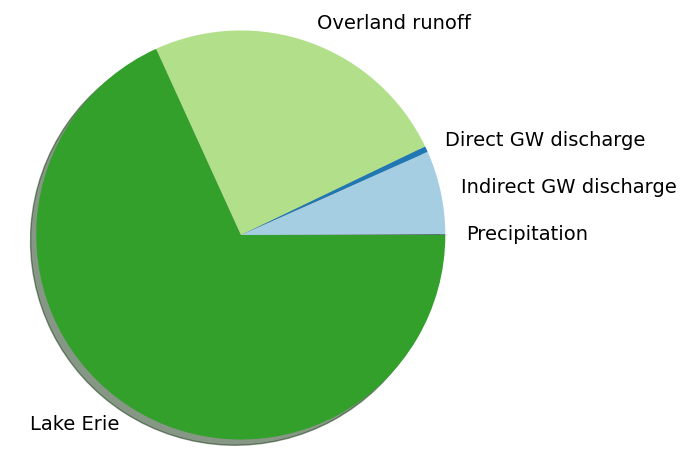

In [15]:
labels = ["Precipitation", "Indirect GW discharge", "Direct GW discharge", "Overland runoff", "Lake Erie"]
y = np.array([la[4]*pr*crain/1e6, 
            da[4]*bf*cgw/1e6, 
            da[4]*bf*cgw*(fdgw-1)/1e6, 
            da[4]*ro*cro/1e6, 
            Qe*ce])
colors = ["black",'#a6cee3','#1f78b4','#b2df8a','#33a02c']
patches, texts = plt.pie(y, colors=colors, labels=labels, shadow=True, textprops={'fontsize': 14})
# plt.legend(patches, labels, loc="best")
plt.axis('equal')
plt.tight_layout()
plt.show()



# mylabels = ["Precipitation", "Indirect GW discharge", "Direct GW discharge", "Overland runoff", "Lake Erie"]

# plt.pie(y, labels = mylabels)
# plt.show()

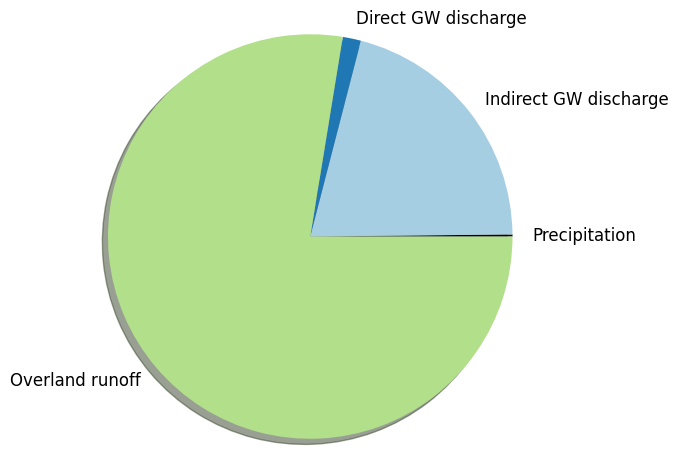

In [13]:
labels = ["Precipitation", "Indirect GW discharge", "Direct GW discharge", "Overland runoff"]
y = np.array([la[4]*pr*crain/1e6, 
            da[4]*bf*cgw/1e6, 
            da[4]*bf*cgw*(fdgw-1)/1e6, 
            da[4]*ro*cro/1e6])
colors = ["black",'#a6cee3','#1f78b4','#b2df8a']
patches, texts = plt.pie(y, colors=colors, labels=labels, shadow=True, textprops={'fontsize': 14})
# plt.legend(patches, labels, loc="best")
plt.axis('equal')
plt.tight_layout()
plt.show()
